<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



Esta es una notebook autocontenida para el análisis de datos de la tabla de características de las carpetas de las imágenes del repositorio [Deuba](https://gitlab.com/ciiiutnfrc/deuba) propuesto para la mentoría *'Detección de objetos en imágenes'*.

Para detalles como se encontró la tabla que vamos a utilizar, revisen la notebook [0_DetecciónObjetos_ArmandoLaTabla.ipynb](0_DetecciónObjetos_ArmandoLaTabla.ipynb)


<a name="exploratory_data_analysis"></a>
## **Consignas para la materia Aprendizaje No Supervisado**

### 1 General 
*FECHA LíMITE DE ENTREGA: 02/10*

Realizar un informe en formato notebook, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañer@s de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia "Aprendisaje No Supervisado". El mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles acciones a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.



### 2 Consignas de Aprendisaje No Supervisado

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

#### 2.1 Exploración de Clustering con dos variables: 

visualizar variables de a pares de las columnas de 0 a 14 (por ejemplo: area, color de los canales, posición) con las mas representativas de las variables que hayan encontrado en las entregas anteriores. 
Colorear por clasificación binaria de acuerdo a las etiquetas.

#### 2.2 Algoritmos de Clústering:
Con los pares de variables del punto anterior que crea adeacuado probar: 
 * *Kmeans*: Probar con diferentes cantidades de grupos por mas que sean 2 las clases conocidas. 
 * *Mean Shift*: Estimar el número de clústers de nuestros datos.
 
Utilizar los métodos del codo y de siluetas para determinar el número óptimo de clústers.

Comparar los números de clúster entre métodos.

También probar: 
 * *DBSCAN*: Estimar la cantidad de clústers. Probar diferentes parámetros. 
 * *Clustering Jerárquicos*: comparar los diferentes tipos de linkage: single, average, complete y ward.
 
 Comparar las etiquetas obtenidas y las del dataset utilizando las métricas de sklearn: Homogeneity, Completeness, V-measure, Adjusted Rand Index, Adjusted Mutual Information, Silhouette Coefficient...
Realizar una tabla con los resultados obtenidos. 


  * ¿Se corresponden las clases que sabemos que hay, con los clústers que encontraron? 

  * ¿Se puede hacer clusters por color predominante en las imágenes?
 

#### 2.3 Visualizacion con embeddings: 

Para obtener las columnas [0-2047] de nuestro dataSet utilizamos la salida de una red neuronal aplicada a imágenes. Esta red nos devuelvió un vector en un espacio determinado que representa la imagen. ["Extract a feature vector for any image with PyTorch"](https://becominghuman.ai/extract-a-feature-vector-for-any-image-with-pytorch-9717561d1d4c?gi=e61c2b015d24).

Como vieron en clase con esta transformación perdemos interpretabilidad de dichas características. 

##### 2.3.1 t-SNE

Explorar opciones para transformar el espacio de dim 2048 en un espacio de dimensión 2 o 3. 

Revisar este [link](https://distill.pub/2016/misread-tsne/) para identificar como influyen los parámetros.

En en el espacio *tSNE*, cuántos clústers encuentran con *Kmeans* y *Mean Shift*?

Pueden visualizar las clases que sabemos que existen sobre los clústers? 

##### 2.3.2 PCA
Retomar la aplicación de PCA de las entregas anteriores y aplicar *Kmeans* y *Mean Shift*. 

Que conclusiones se pueden obtener? 

Comparar ambas transformaciones. 

#### 2.4 Clasificación semisupervisada

Aprovechando que tenemos imágenes, elegir y explorar las mismas y seleccionar un par donde figuren caras con el rostro descubierto y otros con caras con diferentes tipos de barbijos. 
La idea es realizar una segmentación de la imágen para determinar lo que sería un barbijo o una cara o parte de la misma. 

Revisar la  notebook ['ntb3_self_learning.ipynb'](https://github.com/DiploDatos/AprendizajeNOSupervisado/blob/master/2021/ntb3_self_learning.ipynb) 

Entrenar un modelo k-Nearest Neighbor con los pixeles que etiquetaron.


Recordar de documentar los pasos que están llevando a cabo, comentar el código, plantear inconvenientes y contar lo que encontraron, poner conclusiones :).

### 3 Corriendo la Notebook

Clonar el donde están las imágenes y luego moverse entre las carpetas. 

In [1]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path
import os

#from google.colab.patches import cv2_imshow #en Colab!

import seaborn as sns


random_seed = 172

In [2]:
!ls ../

dataset  doc  entregas	poetry.lock  pyproject.toml  README.md


In [3]:
df_train = pd.read_csv('../dataset/dataSet_train_crop_features_labels.csv', low_memory=False)
df_test  = pd.read_csv('../dataset/dataSet_test_crop_features_labels.csv', low_memory=False)

df_clase_ccb = df_train[df_train['clase'] == 'ccb']
df_clase_csb = df_train[df_train['clase'] == 'csb']

df_clase_csb_over = df_clase_csb.sample(df_clase_ccb.shape[0], replace=True, random_state=random_seed)
df_train_balanced = pd.concat([df_clase_ccb, df_clase_csb_over], axis=0)

drop_features = [] # ['xmin', 'xmax', 'ymin', 'ymax','width','height','bb_width','bb_height','use','Unnamed: 0', 'filename', 'videoname']
df_train_balanced = df_train_balanced.drop(drop_features, axis=1)
df_test = df_test.drop(drop_features, axis=1)

### 2.1 Exploración de Clustering con dos variables

Visualizar variables de a pares de las columnas de 0 a 14 (por ejemplo: area, color de los canales, posición) con las mas representativas de las variables que hayan encontrado en las entregas anteriores. Colorear por clasificación binaria de acuerdo a las etiquetas.

In [4]:
df_train.head()

Unnamed: 0                              filename  width  height clase  \
0           0  Video1-frame-000001_single_box_0.jpg    640     360   csb   
1           1  Video1-frame-000002_single_box_0.jpg    640     360   csb   
2           2  Video1-frame-000003_single_box_0.jpg    640     360   csb   
3           3  Video1-frame-000005_single_box_0.jpg    640     360   csb   
4           4  Video1-frame-000006_single_box_0.jpg    640     360   csb   

   xmin  xmax  ymin  ymax    use  ...      2038      2039      2040      2041  \
0   304   359    58   136  train  ...  0.240625  0.174334  0.082095  0.051256   
1   300   363    61   136  train  ...  0.518146  0.330701  0.123241  0.102351   
2   301   368    60   141  train  ...  0.505053  0.262259  0.195963  0.096156   
3   304   364    64   148  train  ...  0.427743  0.051373  0.061770  0.175729   
4   300   366    57   144  train  ...  0.615897  0.227388  0.171615  0.095271   

       2042      2043      2044      2045      2046      2047  
0  0.315918  0.332574  0.003393  0.009189  0.574400  0.002943  
1  0.385447  0.226580  0.119403  0.024265  0.584723  0.016324  
2  0.378540  0.123568  0.130680  0.034125  0.363607  0.022648  
3  0.314424  0.180715  0.015458  0.001125  0.441648  0.007727  
4  0.396625  0.229164  0.042033  0.015454  0.450313  0.105094  

[5 rows x 2064 columns]

In [5]:
list(df_train.columns[2:16])

['width',
 'height',
 'clase',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'use',
 'videoname',
 'bb_width',
 'bb_height',
 'ch_R',
 'ch_G',
 'ch_B']

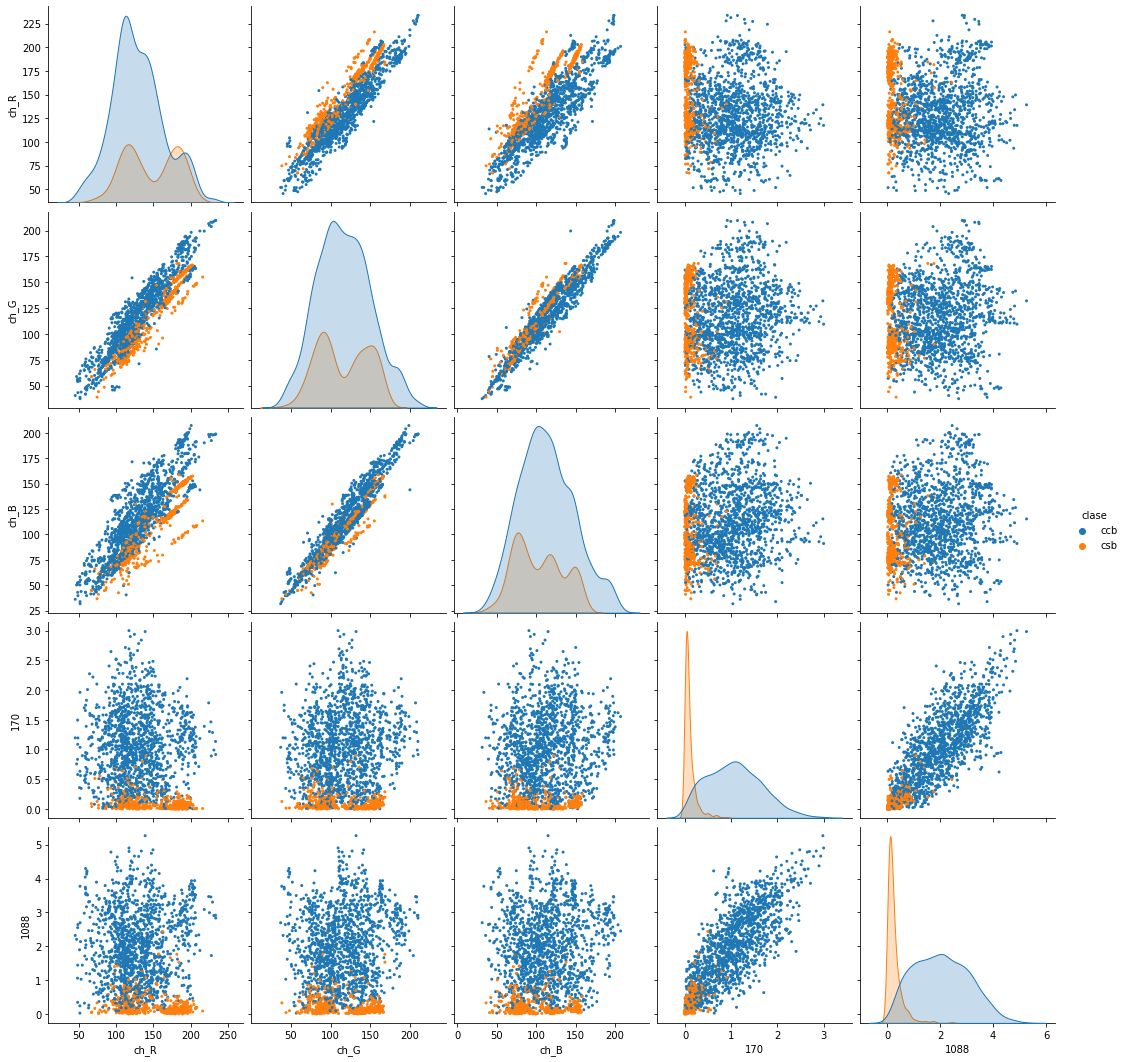

In [6]:
sns.pairplot(
    df_train[["ch_R", "ch_G", "ch_B", "170", "1088", "clase"]],
    hue='clase',
    hue_order=['ccb', 'csb'],
    markers='.',
    plot_kws=dict(edgecolor="None",linewidth=1),
    height=3,
)

sns.despine()

### 2.2 Algoritmos de Clústering
Con los pares de variables del punto anterior que crea adeacuado probar: 
 * *Kmeans*: Probar con diferentes cantidades de grupos por mas que sean 2 las clases conocidas. 
 * *Mean Shift*: Estimar el número de clústers de nuestros datos.
 
Utilizar los métodos del codo y de siluetas para determinar el número óptimo de clústers.

Comparar los números de clúster entre métodos.

In [7]:
from sklearn import cluster

def plot_cols_k_means(cols, k_means):
    fig, axes = plt.subplots(2, 2, figsize=(15, 7))
    X = df_train_balanced[cols]
    model = cluster.KMeans(n_clusters=k_means, random_state=random_seed)
    y_pred = model.fit_predict(X)
    
    ax = axes[0][0]
    sns.scatterplot(x=X[cols[0]], y=X[cols[1]], hue=df_train_balanced["clase"], ax=ax)
    ax = axes[0][1]
    sns.scatterplot(x=X[cols[0]], y=X[cols[1]], hue=y_pred, ax=ax)
    
    # Kmeans with 2 classes
    model = cluster.KMeans(n_clusters=2, random_state=random_seed)
    y_pred = model.fit_predict(X)
    ax = axes[1][0]
    sns.scatterplot(x=X[cols[0]], y=X[cols[1]], hue=y_pred, ax=ax)
    
    # Mean shift
    model = cluster.MeanShift()
    y_pred = model.fit_predict(X)
    ax = axes[1][1]
    sns.scatterplot(x=X[cols[0]], y=X[cols[1]], hue=y_pred, ax=ax)
    
    plt.show()

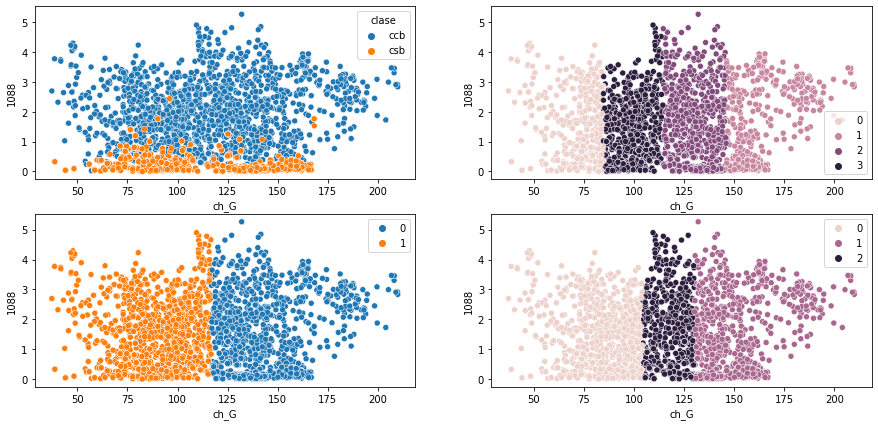

In [8]:
plot_cols_k_means(["ch_G", "1088"], 4)

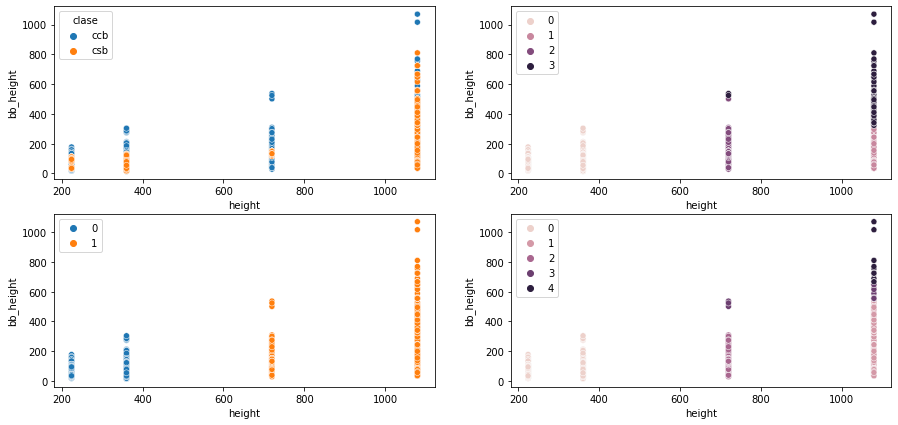

In [9]:
plot_cols_k_means(["height", "bb_height"], 4)

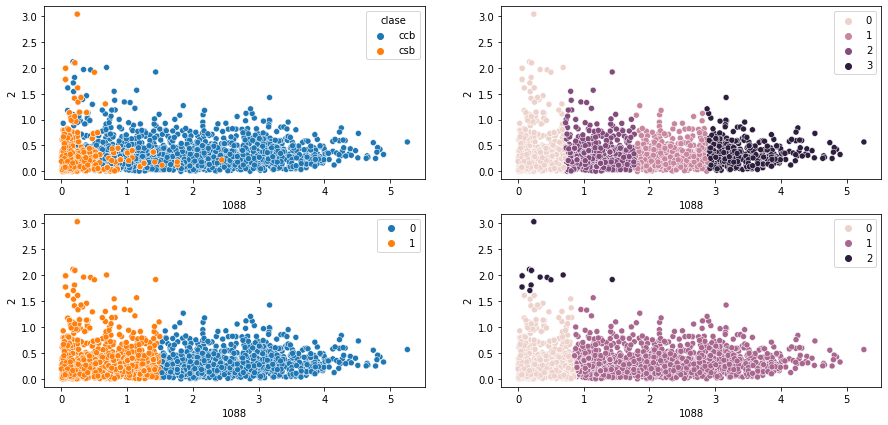

In [10]:
plot_cols_k_means(["1088", "2"], 4)

Extraemos el siguiente ejemplo de la entrega 3, donde se identificaron de las 2048 features, las mas importantes para discriminar las clases objetivo, utilizando feature selection con χ².

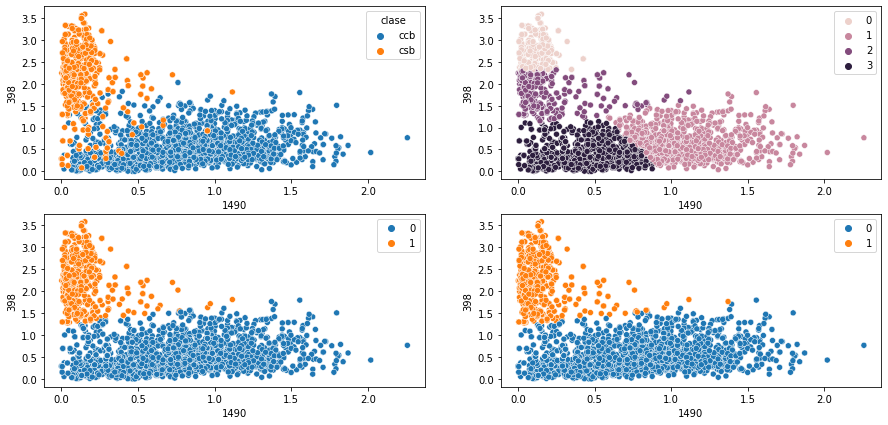

In [11]:
plot_cols_k_means(["1490", "398"], 4)

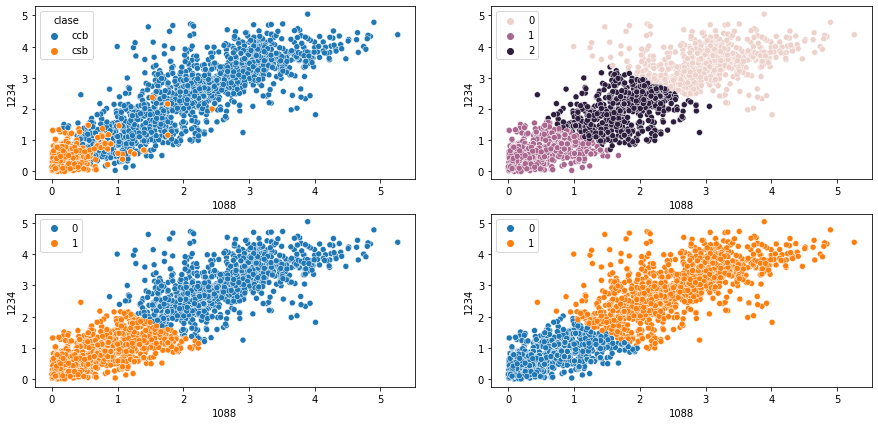

In [12]:
plot_cols_k_means(["1088", "1234"], 3)

# DBSCAN

El metodo de agrupaminto de datos **Density-based spatial clustering of applications with noise (DBSCAN)** es un algoritmo basado en la densidad de los clusters. Este encuentra un número de clusters comenzando por una estimación de la distribución de densidad de los nodos correspondientes. 

Definiciones:

* Un punto p es un punto núcleo si al menos minPts puntos están a una distancia ε de él y, esos puntos son directamente alcanzables desde p. No es posible tener puntos directamente alcanzables desde un punto que no sea un núcleo.
* Un punto q es alcanzable desde p  si existe una secuencia de puntos p 1 , . . . , p n donde p 1 = p  y p n = q  tal que cada punto p i + 1 es directamente alcanzable desde p i ; es decir, todos los puntos de la secuencia deben ser puntos núcleos, con la posible excepción de q.
* Un punto que no sea alcanzable desde cualquier otro punto es considerado ruido.

El metodo:

DBSCAN requiere dos parámetros: e (eps) y el número mínimo de puntos requeridos para que una región se considere densa 5​ (minPts). El algoritmo comienza por un punto arbitrario que no haya sido visitado. La e-vecindad de este punto es visitada, y si contiene suficientes puntos, se inicia un clúster sobre el mismo. De lo contrario, el punto es etiquetado como ruido. Notar que el punto en cuestión puede pertenecer a otra vecindad que lo incluya en el clúster correspondiente.

Si un punto se incluye en la parte densa de un clúster, su e-vecindad también forma parte del clúster. Así, todos los puntos de dicha vecindad se añaden al clúster, al igual que las e-vecindad de estos puntos que sean lo suficientemente densas. Este proceso continúa hasta construir completamente un clúster densamente conectado. Entonces, un nuevo punto no visitado se visita y procesa con el objetivo de descubrir otro clúster o ruido. 


Ventajas:

* no necesita de la especificación del número de clusters 
* puede encontrar clusters con formas geométricas arbitrarias
* tiene noción del ruido, y es robusto detectando outliers
* requiere solo de dos parámetros 
* no es susceptible al orden en que se encuentren los puntos dentro de la base de datos
 
Desventajas:

* no es enteramente determinista: los puntos borde que son alcanzables desde más de un cluster pueden etiquetarse en cualquiera de estos. 
* La calidad depende de la noción de distancia. La distancia más usada es la distancia euclidiana.
* No puede agrupar conjuntos de datos bien con grandes diferencias en las densidades

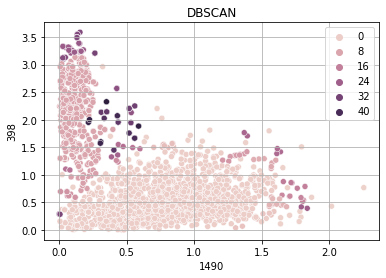

In [13]:
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from matplotlib import pyplot as plt

X = df_train_balanced[["1490", "398"]]


dbscan = DBSCAN(eps=0.07, min_samples=2)
model_dbscan = dbscan.fit(X)
labels = model_dbscan.labels_.astype(float)
n_clusters = Counter(labels)

df = pd.concat([X.reset_index( drop=True), pd.DataFrame(data =labels, columns=["clase"]) ], axis=1)

fig, ax = plt.subplots()
ax.set_title('DBSCAN')
sns.scatterplot(x=df["1490"], y=df["398"], hue=df["clase"], ax=ax)
ax.legend()
ax.grid(True)

plt.show()    
   

In [14]:
labels_true = np.array(df_train_balanced[["clase"]].replace({"csb": 0, "ccb": 1}))[:, 0]

print(f'Estimated number of clusters: {len(n_clusters)}')
# print(f'Estimated number of noise points: {n_noise}')
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))    


Estimated number of clusters: 47
Homogeneity: 0.786
Completeness: 0.426
V-measure: 0.553
Adjusted Rand Index: 0.703
Adjusted Mutual Information: 0.548
Silhouette Coefficient: -0.288


##  Clustering Jerárquico Aglomerativo

El Clustering Jerárquico es un método de data mining para agrupar datos basándose en la distancia entre cada uno y buscando que los datos que están dentro de un clúster sean los más similares entre sí. 

* Single usa la *distancia mínima* entre las observaciones de cada grupo
* Average usa la *media* de las distancias de cada observación de los 2 grupos 
* Complete usa la *distancia máxima* entre todas las observaciones de cada grupo
* Ward *minimiza la varianza* de los clusters



In [15]:
#!pip install --upgrade pandas


clusters: 2
Homogeneity: 0.525
Completeness: 0.553
V-measure: 0.539
Adjusted Rand Index: 0.539
Adjusted Mutual Information: 0.539
Silhouette Coefficient: 0.586


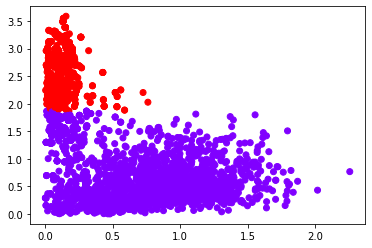

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

X = df_train_balanced[["1490", "398"]]
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
labels = np.array(pd.DataFrame(cluster.labels_,columns=["clase"]))[:, 0]
n_clusters = cluster.n_clusters
plt.scatter(X[["1490"]],X[["398"]], c=cluster.labels_, cmap='rainbow') 

print('clusters: %d' % n_clusters)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"  % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))    

### **Dendogramas**

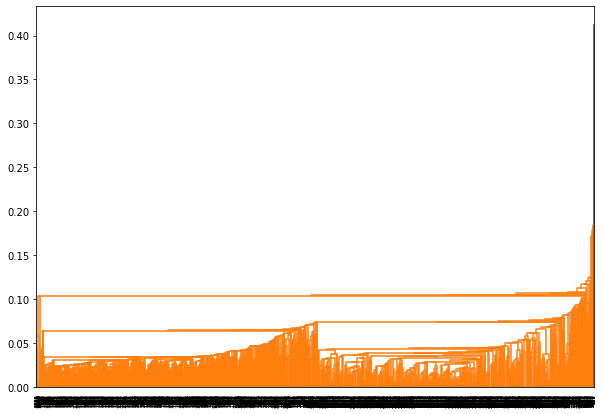

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt


linked = linkage(X, 'single')

#labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

**average**

clusters: 2
Homogeneity: 0.729
Completeness: 0.729
V-measure: 0.729
Adjusted Rand Index: 0.822
Adjusted Mutual Information: 0.729
Silhouette Coefficient: 0.630


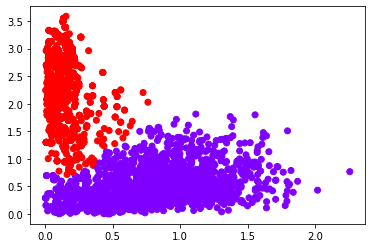

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

X = df_train_balanced[["1490", "398"]]
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster.fit_predict(X) 
labels = np.array(pd.DataFrame(cluster.labels_,columns=["clase"]))[:, 0]
n_clusters = cluster.n_clusters
plt.scatter(X[["1490"]],X[["398"]], c=cluster.labels_, cmap='rainbow') 

print('clusters: %d' % n_clusters)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"  % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))  

**single**

clusters: 2
Homogeneity: 0.000
Completeness: 0.077
V-measure: 0.001
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.314


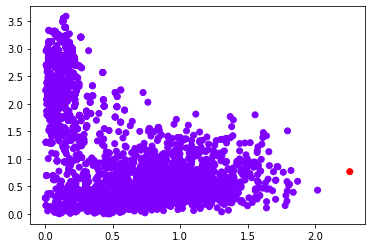

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

X = df_train_balanced[["1490", "398"]]
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(X) 
labels = np.array(pd.DataFrame(cluster.labels_,columns=["clase"]))[:, 0]
n_clusters = cluster.n_clusters
plt.scatter(X[["1490"]],X[["398"]], c=cluster.labels_, cmap='rainbow') 

print('clusters: %d' % n_clusters)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"  % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels)) 

**complete**

clusters: 2
Homogeneity: 0.719
Completeness: 0.721
V-measure: 0.720
Adjusted Rand Index: 0.805
Adjusted Mutual Information: 0.720
Silhouette Coefficient: 0.646


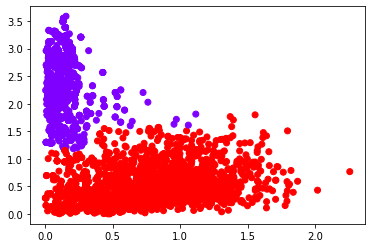

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

X = df_train_balanced[["1490", "398"]]
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
cluster.fit_predict(X) 
labels = np.array(pd.DataFrame(cluster.labels_,columns=["clase"]))[:, 0]
n_clusters = cluster.n_clusters
plt.scatter(X[["1490"]],X[["398"]], c=cluster.labels_, cmap='rainbow') 

print('clusters: %d' % n_clusters)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"  % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels)) 

## 2.3.1 t-sne

t-SNE (T-distributed Stochastic Neighbor Embedding) es un algoritmo diseñado para la visualización de conjuntos de datos de alta dimensionalidad. Si el número de dimensiones es muy alto, Scikit-Learn recomienda en su documentación utilizar un método de reducción de dimensionalidad previo (como PCA) para reducir el conjunto de datos a un número de dimensiones razonable (por ejemplo 50), lo que reducirá el ruido y aligerará la ejecución de t-SNE.

t-SNE se ejecuta en dos pasos: 
* en primer lugar construye una distribución de probabilidad sobre parejas de muestras en el espacio original, de forma tal que las muestras semejantes reciben alta probabilidad de ser escogidas, mientras que las muestras muy diferentes reciben baja probabilidad de ser escogidas. El concepto de "semejanza" se basa en la distancia entre puntos y densidad en las proximidades de un punto. 
* En segundo lugar, t-SNE lleva los puntos del espacio de alta dimensionalidad al espacio de baja dimencionalidad de forma aleatoria, define una distribución de probabilidad semejante a la vista en el espacio destino (el espacio de baja dimensionalidad), y minimiza la denominada divergencia Kullback-Leibler entre las dos distribuciones con respecto a las posiciones de los puntos en el mapa (la divergencia de Kullback-Leibler mide la similitud o diferencia entre dos funciones de distribución de probabilidad). Dicho con otras palabras: t-SNE intenta reproducir la distribución que existía en el espacio original en el espacio final.

bib:https://interactivechaos.com/es/manual/tutorial-de-machine-learning/t-sne

In [21]:
#!pip3 install bioinfokit

In [22]:
import numpy as np
from sklearn.manifold import TSNE

X=df_train[["ch_R", "ch_G", "ch_B", "170", "1088"]]
print("x shape",X.shape)

x = np.asarray(X)

X_embedded = TSNE(n_components=2,init='random',verbose =1).fit_transform(x)

print("X_embedded shape",X_embedded.shape)


x shape (1913, 5)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1913 samples in 0.001s...
[t-SNE] Computed neighbors for 1913 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1913
[t-SNE] Computed conditional probabilities for sample 1913 / 1913
[t-SNE] Mean sigma: 4.819380
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.501877
[t-SNE] KL divergence after 1000 iterations: 0.523700
X_embedded shape (1913, 2)


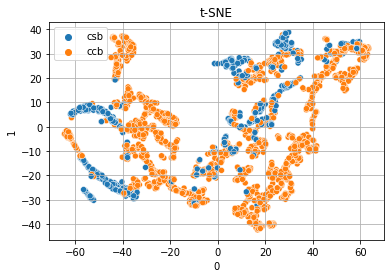

In [23]:
from matplotlib import pyplot as plt

X_embedded = (pd.concat([pd.DataFrame(data = X_embedded), df_train[['clase']]], axis=1))

fig, ax = plt.subplots()
ax.set_title('t-SNE')
sns.scatterplot(x=X_embedded[0], y=X_embedded[1], hue=X_embedded["clase"], ax=ax)
ax.legend()
ax.grid(True)

plt.show()


**t-sne over k-means**

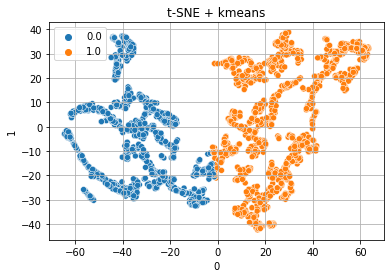

In [24]:
from sklearn import cluster
X_ = np.asarray(X_embedded[[0, 1]])
kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(X_)
Y_ = kmeans.labels_.astype(float)

df = (pd.concat([pd.DataFrame(data = X_), pd.DataFrame(data =Y_, columns=["clase"]) ], axis=1))

fig, ax = plt.subplots()
ax.set_title('t-SNE + kmeans')
sns.scatterplot(x=df[0], y=df[1], hue=df["clase"], ax=ax)
ax.legend()
ax.grid(True)
plt.show()

t-sne over MeanShiftk-means


[2 2 2 ... 1 1 1]


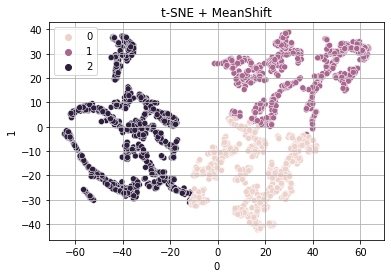

In [25]:
X_ = np.asarray(X_embedded [[0, 1]])
bandwidth = cluster.estimate_bandwidth(X_, quantile=0.2, n_samples=int(len(X_)*0.5))

MS = cluster.MeanShift(bandwidth=bandwidth)#, bin_seeding=True)


Y_ = MS.fit_predict(X_)
print (Y_)

df = (pd.concat([pd.DataFrame(data = X_), pd.DataFrame(data =Y_, columns=["clase"]) ], axis=1))

fig, ax = plt.subplots()
ax.set_title('t-SNE + MeanShift')
sns.scatterplot(x=df[0], y=df[1], hue=df["clase"], ax=ax)
ax.legend()
ax.grid(True)
plt.show()

# 2.3.2  PCA

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_)
normalized_X_np = scaler.transform(X_)
#normalized_X_np = normalized_X_np.transpose()
print(normalized_X_np.shape)
normalized_X_np

(1913, 2)


array([[0.06055248, 0.36098248],
       [0.08201581, 0.31348604],
       [0.11936957, 0.27366644],
       ...,
       [0.78605795, 0.7130124 ],
       [0.78319925, 0.7189199 ],
       [0.703266  , 0.6797061 ]], dtype=float32)

In [27]:
from sklearn import decomposition
from sklearn import datasets

explained_variance_components = 2
pca = decomposition.PCA(n_components=explained_variance_components)
pca.fit(normalized_X_np)
pca_X = pca.transform(normalized_X_np)

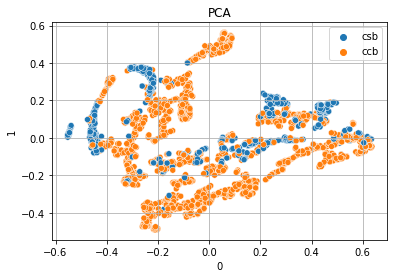

In [28]:
df_pca = (pd.concat([pd.DataFrame(data = pca_X), pd.DataFrame(data =df_train[["clase"]], columns=["clase"]) ], axis=1))

fig, ax = plt.subplots()
ax.set_title('PCA')
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=df_pca["clase"], ax=ax)
ax.legend()
ax.grid(True)
plt.show()

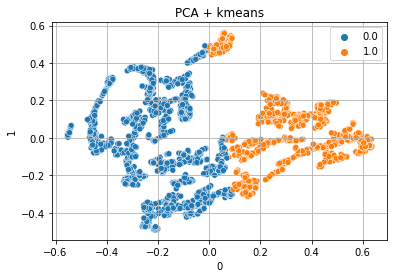

In [29]:
kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(pca_X)
Y_ = kmeans.labels_.astype(float)

df = (pd.concat([pd.DataFrame(data = pca_X), pd.DataFrame(data =Y_, columns=["clase"]) ], axis=1))

fig, ax = plt.subplots()
ax.set_title('PCA + kmeans')
sns.scatterplot(x=df[0], y=df[1], hue=df["clase"], ax=ax)
ax.legend()
ax.grid(True)
plt.show()

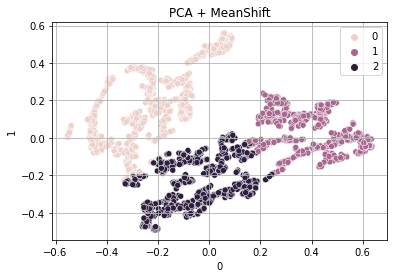

In [30]:
bandwidth = cluster.estimate_bandwidth(pca_X, quantile=0.2, n_samples=int(len(pca_X)*0.5))

MS = cluster.MeanShift(bandwidth=bandwidth)#, bin_seeding=True)


Y_ = MS.fit_predict(pca_X)

df = (pd.concat([pd.DataFrame(data = pca_X), pd.DataFrame(data =Y_, columns=["clase"]) ], axis=1))

fig, ax = plt.subplots()
ax.set_title('PCA + MeanShift')
sns.scatterplot(x=df[0], y=df[1], hue=df["clase"], ax=ax)
ax.legend()
ax.grid(True)
plt.show()

# 2.4 Clasificación semisupervisada

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

In [32]:
img_cv = cv2.imread('../doc/img/ccb_1.jpg')
img = img_cv.copy()
img[:,:,[2,1,0]] = img_cv


componente roja(R) del pixel (0,0): 148
componente verde(G) del pixel (0,0): 132


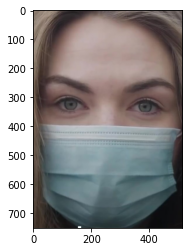

In [33]:
plt.imshow(img)
print('componente roja(R) del pixel (0,0):', img[0,0,0])
print('componente verde(G) del pixel (0,0):', img[0,0,1])
plt.show()

In [34]:
roi1=(80, 100, 300, 100)  # piel
roi2=(0, 0, 33, 40)  # pelo
roi3=(120, 500, 121, 100)  # barbijo
rois=[roi1,roi2,roi3]

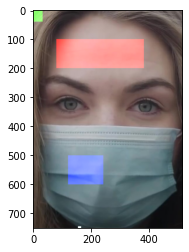

In [35]:
img_rois=img.copy()

for i in range(3):
  roi=rois[i]
  f1=roi[1]
  ff=roi[1]+roi[3]
  c1=roi[0]
  cf=roi[0]+roi[2]
  img_rois[f1:ff,c1:cf,i]=255

plt.imshow(img_rois)
plt.show()

In [36]:
dims=img.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
data0=np.zeros([cant_pixeles,4],dtype='int')
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro=f*cant_columnas+c
        data0[nro,0]=nro
        data0[nro,1:4]=img[f,c,:]
        
df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
df.head()        

Tamaño de Base de pixeles: (385500, 4)


pixel_id  rojo  verde  azul
0         0   148    132   119
1         1   147    131   118
2         2   146    130   117
3         3   145    129   116
4         4   144    128   115

In [37]:
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,5],dtype='int')
target=np.zeros(cantidad,dtype='int')
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            nro=fil*cant_columnas+col
            data[cuenta,0]=nro
            data[cuenta,1:4]=img[fil,col,:]
            data[cuenta,4]=i+1
            target[cuenta]=i+1
            cuenta=cuenta+1

df_etiquetado = pd.DataFrame(data, columns=["pixel_id","rojo","verde","azul","etiqueta"])
print(df_etiquetado.shape)
print('Base de pixeles etiquetados:')
df_etiquetado.head()

43420
(43420, 5)
Base de pixeles etiquetados:


pixel_id  rojo  verde  azul  etiqueta
0     51480    80     62    62         1
1     51481    81     63    63         1
2     51482    84     64    63         1
3     51483    85     65    64         1
4     51484    87     66    63         1

cantidad de muestras etiquetadas: 43420
cantidad de clases etiquetadas: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


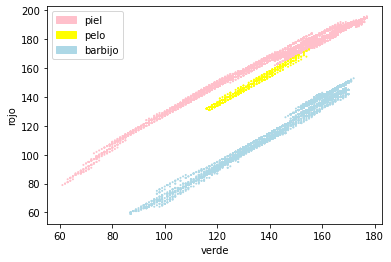

In [38]:
colores=['pink','yellow','lightblue']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_etiquetado[variable1].values
f2 = df_etiquetado[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de muestras etiquetadas:',l)
print('cantidad de clases etiquetadas:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    if(f3[k]==1):
        asignar.append(colores[0])
    elif (f3[k]==2):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='piel')
patch2 = mpatches.Patch(color=colores[1], label='pelo')
patch3 = mpatches.Patch(color=colores[2], label='barbijo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

<ipython-input-39-5f85707e5fd1>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


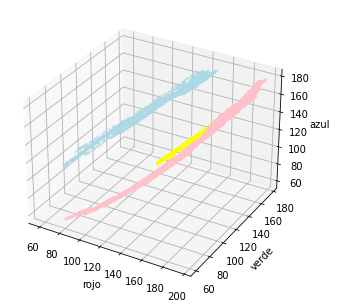

In [39]:
fig =plt.figure()
ax = Axes3D(fig)

ax.scatter(df_etiquetado[variables[0]].values, df_etiquetado[variables[1]].values, df_etiquetado[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

   pixel_id  rojo  verde  azul  etiqueta
0         0   148    132   119         2
1         1   147    131   118         2
2         2   146    130   117         2
3         3   145    129   116         2
4         4   144    128   115         2
342080
385500
proporción de datos etiqueados: 0.11263294422827497


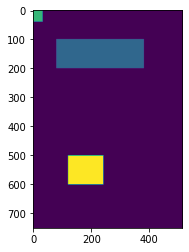

In [40]:
#Base completa con etiquetas y no etiquetados en 0
a=img.shape
df_completo=df.copy()
df_completo.astype(int)## cambiar el tipo de dato 
df_completo['etiqueta']=0*df_completo['rojo']
#se asignan en el completo las etiquetas de ROIS
for i in range(l):
    lugar=df_etiquetado['pixel_id'][i].astype(int)
    df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
print(df_completo.head())
print(sum(df_completo.etiqueta==0))
print(cant_pixeles)
print('proporción de datos etiqueados:',sum(df_completo.etiqueta!=0)/cant_pixeles)
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)
plt.show()

In [41]:
n_neighbors = 5
data_rgb=data[:,1:4]

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data_rgb, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 1.00


(750, 514, 3)
[1]


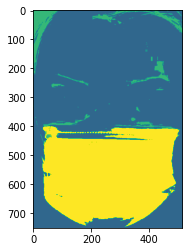

In [42]:
a=img.shape
print(a)
clasif=np.zeros(a[0:2],dtype='int')
print(knn.predict([[40, 80, 40]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([img[i,j,:]])        
clasif[0,0]=0 #para unificar paletas (con 4 colores)         
plt.imshow(clasif)
plt.show()  

In [43]:
from statistics import mode
clasif2=clasif.copy()
for i in range(2,a[0]-2):
    for j in range(2,a[1]-2):
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
clasif2[0,0]=0

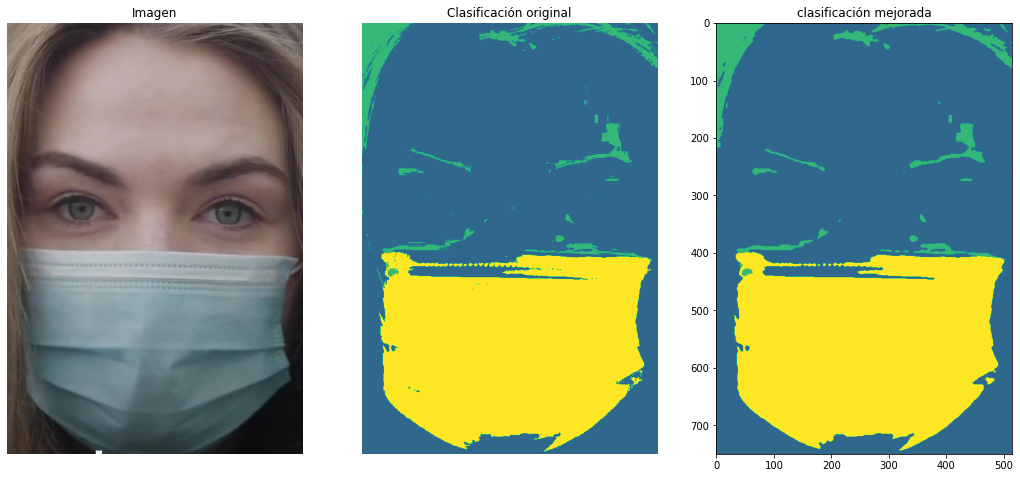

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(img)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

# Conclusiones

- Los métodos de clustering jerárquicos dan resultados similares para llinkage "average" y "complete".
- Se observóo que los resultados obtenidos con PCA en este caso, obtuvo formas similares a t-SNE pero rotadas.
- No observamos correlación entre los clusters generados por los diferentes métodos estudiados y la verdad de campo. Por otro lado, si resulta útil para la exploración de las variables.
- La combinación de clustering con clasificación de pixeles parece agregar valor de interpretabilidad al análisis.